# Gather

I downloaded the “twitter_archive_enhanced.csv”  and “image_predictions.tsv” manually, uploaded them in the project work space, by clicking the "Upload" button in the top righthand corner of the dashboard.
<br>
As for the retweet and favorite counts, I created a developer account on Twitter, set up my Twitter application, generated the needed access tokens and keys. Then call the Twitter API, save a JSON file to my workspace, loop over the file and store the retweet & favorite variables into a Panda Dataframe along with the tweet id.


In [65]:
#importing all relevant packages
import tweepy
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [66]:
#reading the tweet archive csv
tweets_df = pd.read_csv("twitter-archive-enhanced.csv")

In [67]:
#reading the image predictions file
pred_df = pd.read_csv('image-predictions.tsv', sep = '\t')

In [ ]:
# Setting up and calling the twitter API
# I hid my api keys
consumer_key = 'xxx'
consumer_secret = 'xxx'
access_token = 'xxx'
access_secret = 'xxx'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tweets_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [68]:
#read the generated json file
with open('tweet-json.txt') as f:
    data = [json.loads(line) for line in f]

In [69]:
# Store the json file into a data frame, keeping only the tweet_id, retweet_count & favorite_count
ids = []
retweet = []
favourite = []
for i in data:
    ids.append(i['id'])
    retweet.append(i['retweet_count'])
    favourite.append(i['favorite_count'])
    

In [70]:
#creating a new data frame
retweet_df = pd.DataFrame({'tweet_id' : ids, 'retweet_count' : retweet, 'favourite_count' :favourite})

# Assess

**Assesing the "tweet archive" dataframe**

In [7]:
#display summary of the twitter archive dataframe to assess the data visually
tweets_df.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
#trying another sample to assess the data visually
tweets_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1159,724046343203856385,NaN,NaN,2016-04-24 01:24:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sarge. Not even he knows what his tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724046343...,10,10,Sarge,None,None,None,None
641,793226087023144960,NaN,NaN,2016-10-31 23:00:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Juno. She spooked me up real good, but...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/793226087...,11,10,Juno,None,None,None,None
2303,666996132027977728,NaN,NaN,2015-11-18 15:07:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carll. He wants to be a donkey. But al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666996132...,10,10,Carll,None,None,None,None
1595,686358356425093120,NaN,NaN,2016-01-11 01:25:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Heartwarming scene here. Son reuniting w fathe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686358356...,10,10,None,None,None,None,None
901,758474966123810816,NaN,NaN,2016-07-28 01:31:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brandonald. He accidentally opened the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758474966...,11,10,Brandonald,None,None,None,None


In [38]:
#check the denominator unique values
tweets_df['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [78]:
#checking null values & columns formats
tweets_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [81]:
#Looking for duplicated tweet_id values
tweets_df['tweet_id'].duplicated().sum()


0

In [15]:
#Checking the num of tweet ids
tweets_df.tweet_id.count()


2356

**Quality:**
<br>
- A lot of columns have many null values (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
<br>
- Timestamp columns aren't in date format
<br>
- tweet_id format should be string
<br>
- "name" column isn't very informative


**Assesing the "retweet & favourite" dataframe**

In [138]:
#display summary of the dataframe to assess the data visually
retweet_df.head()


,tweet_id,retweet_count,favourite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [13]:
#checking null values and columns formats
retweet_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id           2354 non-null int64
retweet_count      2354 non-null int64
favourite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [14]:
#Looking for duplicated tweet_id values
retweet_df['tweet_id'].duplicated().sum()



0

In [61]:
#Checking the num of tweet ids
retweet_df.tweet_id.count()


2354

**Quality:**
<br>
- tweet_id should be string
<br>
- The JSON file is missing 2 tweet ids that are present in the tweet archive file


Assesing the image predeiction dataframe

In [33]:
#display summary of the dataframe to assess the data visually
pred_df.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
#checking null values and column formats
pred_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [87]:
#Looking for duplicated tweet_id values
pred_df['tweet_id'].duplicated().sum()


0

In [18]:
#Checking the num of tweet ids
pred_df.tweet_id.count()


2075

**Quality:**
<br>
- Inconsistency in breed names,  a mix of caps, lower & title formats, should be standardized
<br>
- tweet_id should be also string
<br>
- Column names could be more descriptive
<br>
- The file is missing 279 tweet ids compared to the tweet archive file
<br>
- Wrong categorization for breed names, some tweets have wrong values like (laptop, microphone, limousine)


**Tidiness:**
<br>
- All the 3 dataframes can be combined into only one dataframe
<br>
- Not all columns are really useful, many columns could be dropped
<br>
- The rating columns (rating_numerator, rating_denominator) can be merged into one variable

# Clean

After identifying the data issues above, I clean each issue in every data frame, keep only the needed columns for my analysis, and finally export the clean csv file.
<br>
In this excersice, I want to answer 3 questions:
<br>
- Which dog breeds have the most retweets?
- Which dog breed have the most favourites?
- Which dog breed have the highest ratings?


**Cleaning the tweet archive dataframe**

In [71]:
#Making a copy and keeping only the needed columns of the tweets archive dataframe
tweets_df_clean = tweets_df[['tweet_id','rating_numerator','rating_denominator', 'timestamp']].copy()


In [72]:
# converting tweet_id into string
tweets_df_clean['tweet_id'] = tweets_df_clean['tweet_id'].astype('object')

In [73]:
# converting timestamp into date format
tweets_df_clean['timestamp'] = pd.to_datetime(tweets_df_clean['timestamp'])

In [74]:
# merging the rating columns into one column
tweets_df_clean['rating'] = tweets_df_clean['rating_numerator'] / tweets_df_clean['rating_denominator']


In [75]:
#dropping (rating_numerator',rating_denominator) columns
tweets_df_clean = tweets_df_clean.drop([ 'rating_numerator','rating_denominator'], axis = 1)

In [76]:
# Reviewing the format of the columns
tweets_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
tweet_id     2356 non-null object
timestamp    2356 non-null datetime64[ns]
rating       2356 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 55.3+ KB


In [91]:
# reviewing the outcome
tweets_df_clean.head()


,tweet_id,timestamp,rating
0,892420643555336193,2017-08-01 16:23:56,1.3
1,892177421306343426,2017-08-01 00:17:27,1.3
2,891815181378084864,2017-07-31 00:18:03,1.2
3,891689557279858688,2017-07-30 15:58:51,1.3
4,891327558926688256,2017-07-29 16:00:24,1.2


**Cleaning the image prediction dataframe**

In [86]:
#Clean and keep only the prediction 1 columns for our analysis
pred_df_clean = pred_df[['tweet_id','p1','p1_conf']].copy()


In [87]:
# converting tweet_id in the image prediction data frame into string
pred_df_clean['tweet_id'] = pred_df_clean['tweet_id'].astype('object')


In [88]:
# making the column names more descriptive
pred_df_clean.rename(columns = {'p1': 'dog_breed', 'p1_conf': 'confidence_level'}, inplace = True)


In [89]:
# Converting all breed names into lower
pred_df_clean['dog_breed'] = pred_df_clean['dog_breed'].str.lower()


The breednames that are miscateocrized have small num of tweets which means filtering by tweet count when analyzing the data should do the trick in weeding them out



In [90]:
# reviewing the outcome
pred_df_clean.head()

,tweet_id,dog_breed,confidence_level
0,666020888022790149,welsh_springer_spaniel,0.465074
1,666029285002620928,redbone,0.506826
2,666033412701032449,german_shepherd,0.596461
3,666044226329800704,rhodesian_ridgeback,0.408143
4,666049248165822465,miniature_pinscher,0.560311


**Cleaning the retweet & favourite dataframe**

In [93]:
# Make a copy of the of the retweet & favourite data frame
retweet_df_clean = retweet_df.copy()

In [94]:
# converting tweet_id in the retweet & favourite dataframe into string
retweet_df_clean['tweet_id'] = retweet_df_clean['tweet_id'].astype('object')

**Merging the 3 cleaned dataframe into one dataframe**

In [95]:
#merge the cleaned image prediction and tweet archive data frame
df_clean = tweets_df_clean.merge(pred_df_clean, how = 'inner', on = 'tweet_id') 



In [96]:
#mergin the cleaned retweet & favourite with and tweet archive & image prediction data frame
df_clean = df_clean.merge(retweet_df_clean , how = 'inner', on = 'tweet_id') 



In [97]:
# Display summary of the new cleaned data frame
df_clean.head()

,tweet_id,timestamp,rating,dog_breed,confidence_level,retweet_count,favourite_count
0,892420643555336193,2017-08-01 16:23:56,1.3,orange,0.097049,8853,39467
1,892177421306343426,2017-08-01 00:17:27,1.3,chihuahua,0.323581,6514,33819
2,891815181378084864,2017-07-31 00:18:03,1.2,chihuahua,0.716012,4328,25461
3,891689557279858688,2017-07-30 15:58:51,1.3,paper_towel,0.170278,8964,42908
4,891327558926688256,2017-07-29 16:00:24,1.2,basset,0.555712,9774,41048


In [98]:
#Do a quick checkup on formats and null values
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 7 columns):
tweet_id            2073 non-null object
timestamp           2073 non-null datetime64[ns]
rating              2073 non-null float64
dog_breed           2073 non-null object
confidence_level    2073 non-null float64
retweet_count       2073 non-null int64
favourite_count     2073 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 129.6+ KB


# Analyze and Visualize

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73672789e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f73663da278>]], dtype=object)

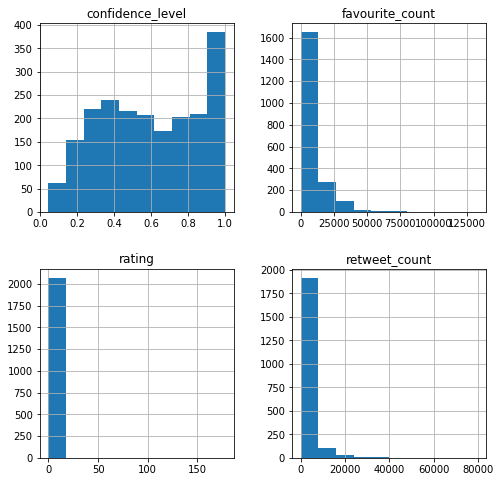

In [100]:
# Exploring the whole dataframe with histograms
df_clean.hist(figsize = (8,8))

 **Which dog breeds have the most retweets & Favourites?**

Text(0,0.5,'Number of Retweets & Favorites')

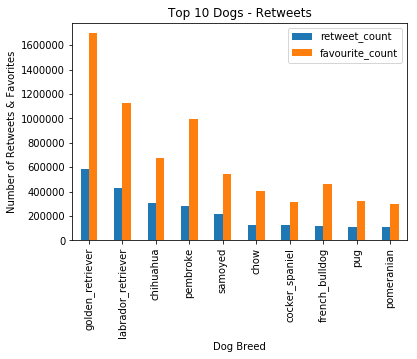

In [156]:
most_retweets_favourites = df_clean.groupby('dog_breed')['retweet_count','favourite_count'].sum().sort_values(
    by='retweet_count', ascending = False).head(10).reset_index()
most_retweets_favourites.plot(x = 'dog_breed', y = ['retweet_count', 'favourite_count'], kind = 'bar')
plt.title('Top 10 Dogs - Retweets')
plt.xlabel('Dog Breed')
plt.ylabel('Number of Retweets & Favorites')


 **Which dog breeds have the best ratings?**

In [136]:
df_clean.groupby('dog_breed').rating.mean().sort_values(ascending = False).head(10)

dog_breed
bow_tie             45.15
microphone          42.00
clumber              2.70
military_uniform     1.40
pedestal             1.40
laptop               1.40
limousine            1.40
pole                 1.40
prison               1.40
padlock              1.30
Name: rating, dtype: float64

In [152]:
#agg the data by dog breed
most_favorite = df_clean.groupby('dog_breed').agg({'rating':'mean', 'tweet_id':'count'})


Text(0,0.5,'Rating')

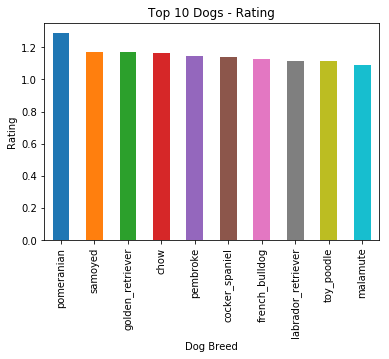

In [157]:
#filtering and keeping only dog breed that have more that 20 tweets
best_ten = most_favorite.query('tweet_id > 20').rating.sort_values(ascending = False).head(10)
best_ten.plot(x='dog_breed', y ='rating', kind = 'bar')
plt.title('Top 10 Dogs - Rating')
plt.xlabel('Dog Breed')
plt.ylabel('Rating')

In [162]:
#total num of favorited tweets
df_clean.favourite_count.sum()

17738077

In [160]:
#total num of retweets
df_clean.retweet_count.sum()

6169433

In [137]:
#Store the clean DataFrame(s) in a CSV file
df_clean.to_csv('twitter_archive_master.csv')

# Summary & Conclusion

- People tend to favorite tweets more than retweeting them, the total number of retweets stand at 6169433 vs 17738077 favorited tweets
<br>
- Golden retriever have the most retweeted and favorited tweets, followed by Labrador retriever, then Chihuahua comes third
<br>
- There is no big correlation between the number of retweets and favorites, it’s not necessarily that dog breeds that have most retweets will have the most favorites. For example, Pedestal dog breed has more “favorited tweets” than Chihuahua, however Chihuahua got more retweets, which means that people find Chihuahua’s tweets more interesting to retweet than to favorite.
<br>
- Pomeranian & Samoyed dog breeds have the best ratings, followed by Golden Retriever breed. Keeping only dog breeds that have more than 20 tweets, to ensure that the results are statistically significant and we’re comparing apples to apples
<br>
- Golden Retrievers seem to be the most popular dog breed, received most of the tweets and hence most of the interactions, however didn’t have the best rating, they came third after Pomeranian & Samoyed dog breeds which received a lower number of tweets
<br>
- Apparently, there is also no relationship between the retweet & favorite count and the ratings. It’s not necessarily that dog breed that have the best ratings received the most retweets and favorites
<br>
- Some breeds received very few tweets, so looking at retweet & favorite counts may not tell the whole story. Also, looking at the rating by itself might be misleading and lead to in-accurate conclusions. Therefore, I filtered only dog breeds that have more than 20 tweets